In [38]:
%matplotlib inline
import math

import matplotlib.pyplot as plt
import numpy as np
from scipy import integrate

In [39]:
def H1(theta, phi):
    x_0 = a * np.cos(theta) * np.cos(phi)
    y_0 = a * np.cos(theta) * np.sin(phi)
    z_0 = a * lambda1 * np.sin(theta)
    R1_0 = ((x_0 - x1) ** 2 + (y_0 - y1) ** 2 + (z_0 - z1) ** 2) ** 0.5
    R2_0 = ((x2 - x_0) ** 2 + (y2 - y_0) ** 2 + (z2 - z_0) ** 2) ** 0.5
    G = 4 * pi * R1_0 ** 5
    Hx1_0 = (Px * (2 * (x_0 - x1) ** 2 - (y_0 - y1) ** 2 - (z_0 - z1) ** 2) + Py * 3 * (y_0 - y1) * (
                x_0 - x1) + Pz * 3 * (x_0 - x1) * (z_0 - z1)) / G
    Hy1_0 = (Px * 3 * (x_0 - x1) * (y_0 - y1) + Py * (
                2 * (y_0 - y1) ** 2 - (x_0 - x1) ** 2 - (z_0 - z1) ** 2) + Pz * 3 * (y_0 - y1) * (z_0 - z1)) / G
    Hz1_0 = (Px * 3 * (x_0 - x1) * (z_0 - z1) + Py * 3 * (y_0 - y1) * (z_0 - z1) + Pz * (
                2 * (z_0 - z1) ** 2 - (x_0 - x1) ** 2 - (y_0 - y1) ** 2)) / G
    return x_0, y_0, z_0, Hx1_0, Hy1_0, Hz1_0, R2_0

In [40]:
def fx(theta, phi):
    x, y, z, Hx1, Hy1, Hz1, R2 = H1(theta, phi)
    Hx2_int = ((Hy1 * np.cos(phi) - Hx1 * np.sin(phi)) * lambda1 * (y - y2) * (np.cos(theta)) ** 2 +
               (Hz1 * lambda1 * (np.cos(theta)) ** 2 * np.cos(phi) - Hx1 * np.cos(theta) * np.sin(phi)) * (z - z2)) / (
                          R2 ** 3)
    return Hx2_int

In [41]:
def fy(theta, phi):
    x, y, z, Hx1, Hy1, Hz1, R2 = H1(theta, phi)
    Hy2_int = ((Hx1 * np.sin(phi) - Hy1 * np.cos(phi)) * lambda1 * (x - x2) * (np.cos(theta)) ** 2 +
               (Hz1 * lambda1 * (np.cos(theta)) ** 2 * np.sin(phi) - Hy1 * np.cos(theta) * np.sin(phi)) * (z - z2)) / (
                          R2 ** 3)
    return Hy2_int

In [42]:
def fz(theta, phi):
    x, y, z, Hx1, Hy1, Hz1, R2 = H1(theta, phi)
    Hz2_int = ((Hx1 * np.sin(theta) * np.cos(theta) - Hz1 * (np.cos(theta)) ** 2 * np.sin(phi)) * (x - x2) +
               (Hy1 * np.sin(theta) * np.cos(theta) - Hz1 * lambda1 * np.cos(theta) * np.sin(phi)) * (y - y2)) / (
                          R2 ** 3)
    return Hz2_int

In [43]:
pi = math.pi
Px = 0
Py = 0
Pz = 60
a = 0.3
hl = [0.4]
tl = np.linspace(-5, 5, 51)
theta_0 = 0 * (pi / 180)  # 交会角
d = 1.5
lambda1 = 6

x1_t = tl * np.sin(theta_0) - d * np.sin(theta_0)
z1_t = tl * np.cos(theta_0) - d * np.cos(theta_0)
x2_t = tl * np.sin(theta_0)
z2_t = tl * np.cos(theta_0)

In [44]:
hj = list(range(0, len(hl)))
ti = list(range(0, len(tl)))
Bx2 = np.empty((len(hl), len(tl)))
By2 = np.empty((len(hl), len(tl)))
Bz2 = np.empty((len(hl), len(tl)))

In [45]:
for j in hj:
    h = hl[j]
    y1_t = (h + a) * np.ones_like(x1_t)
    y2_t = y1_t
    #C0 = (Px * 6 * h * d) * 100.0 /  (4 * h ** 2 + d ** 2) ** 2.5
    for i in ti:
        t = tl[i]
        x1 = x1_t[i]
        y1 = y1_t[i]
        z1 = z1_t[i]
        x2 = x2_t[i]
        y2 = y2_t[i]
        z2 = z2_t[i]
        Hx2_int, err1 = integrate.dblquad(fx, 0, 2 * pi, lambda g: -pi / 2, pi / 2)
        Bx2[j][i] = Hx2_int * a ** 2 * 200
        Hy2_int, err2 = integrate.dblquad(fy, 0, 2 * pi, lambda g: -pi / 2, pi / 2)
        By2[j][i] = Hy2_int * (a ** 2) * 200  #单位转换为nT
        Hz2_int, err3 = integrate.dblquad(fz, 0, 2 * pi, lambda g: -pi / 2, pi / 2)
        Bz2[j][i] = Hz2_int * a ** 2 * 200

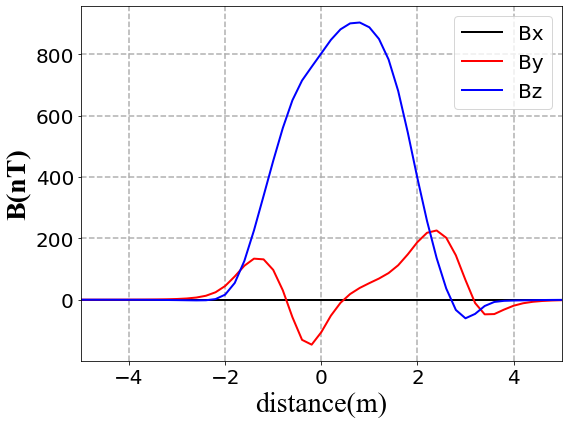

In [46]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(tl, -Bx2[0][:], '-', linewidth=2, color="black", label='Bx')
ax.plot(tl, By2[0][:], '-', linewidth=2, color="red", label='By')
ax.plot(tl, Bz2[0][:], '-', linewidth=2, color="blue", label='Bz')
#ax.plot(tl, By2[1][:], '--', linewidth=2, color="red", label='h=0.6')
#ax.plot(tl, By2[2][:], '-', linewidth=2, color="blue", label='h=0.9')
#ax.plot(tl, By2[3][:], '-', linewidth=2, color="green", label='h=0.9')
ax.set_xlim(-5, 5)
#ax.set_ylim(-0.4, 1)
font1 = {'family': 'Times New Roman',
         'weight': 'normal',
         'style': 'normal',
         'size': 28,
         }
font2 = {'family': 'Times New Roman',
         'weight': 'bold',
         'style': 'normal',
         'size': 28,
         }
ax.set_xlabel('distance(m)', font1)
ax.set_ylabel('B(nT)', font2)
ax.tick_params(labelsize=20)
#ax.set_title("天线互相垂直配置下圆柱体目标\n反射信号的规范化通过曲线", fontproperties="SimHei", fontsize=18)
ax.grid(True, linestyle='--', linewidth=1.5)
ax.legend(fontsize=20)
plt.tight_layout()
fig.savefig("图2天线互相垂直配置下圆柱体目标反射信号的规范化通过曲线.png")
plt.show()